In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('dark_background')
import numpy as np
import scipy as sp
plt.rcParams['image.origin'] = 'lower' 
from astroquery.simbad import Simbad
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
from radio_beam import Beam
from astropy.io import fits
from astropy.units import cds
import astropy.units as u

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [2]:
%run get_and_plot_vizier_nir.py

In [3]:
#%run get_and_plot_vizier_nir.py
%run functions.py

In [4]:
stars_background_im1, turbulent_stars1, turbulence1, header1 = get_and_plot_vizier_nir(imsize=512, fov=5*u.arcmin)

C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


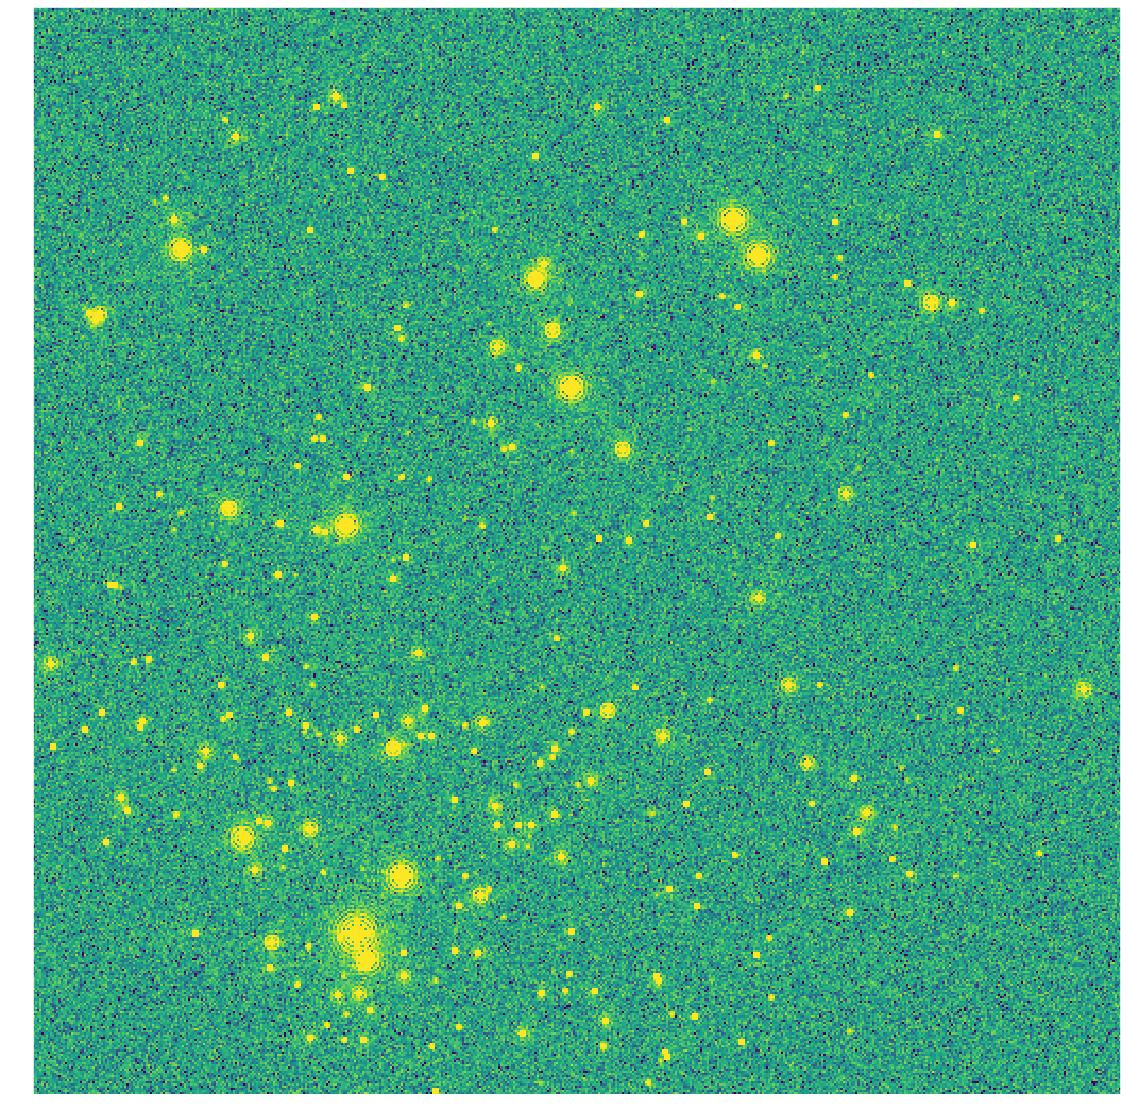

In [5]:
plt.figure(figsize=(20,20))
plt.imshow(stars_background_im1,
          norm=visualization.simple_norm(stars_background_im1, stretch='asinh',
                                         max_percent=99, min_percent=1))

In [6]:
stars_background_im2, turbulent_stars2, turbulence2, header2 = get_and_plot_vizier_nir()

C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


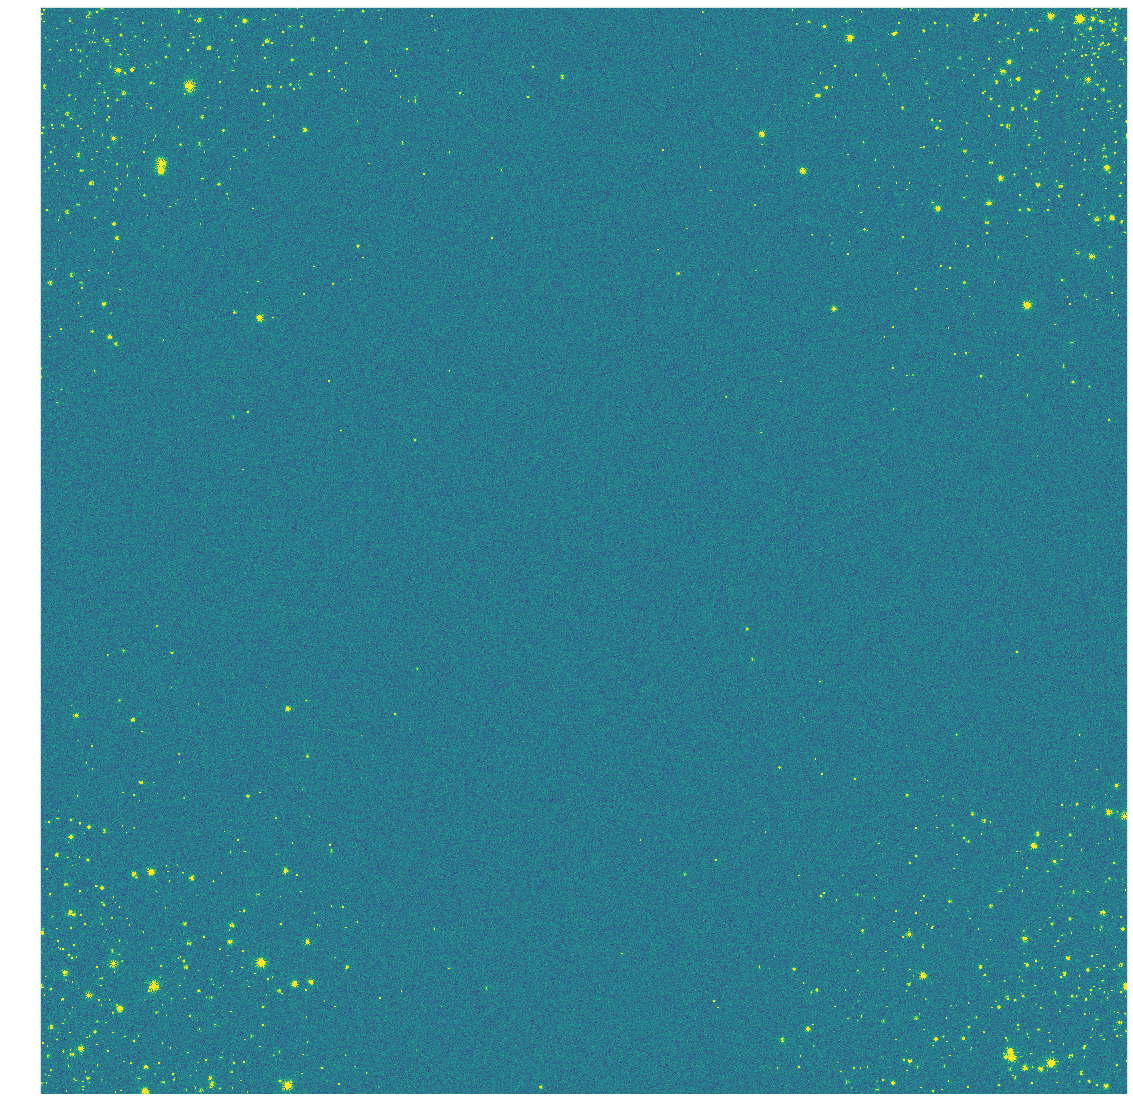

In [24]:
plt.figure(figsize=(20,20))
plt.imshow(stars_background_im2, vmax=400)

In [11]:
np.min(stars_background_im2), np.max(stars_background_im2)

(90.57420082938201, 268275.12580080715)

In [4]:
stars_background_im = make_stars_im(1000, nstars=100)

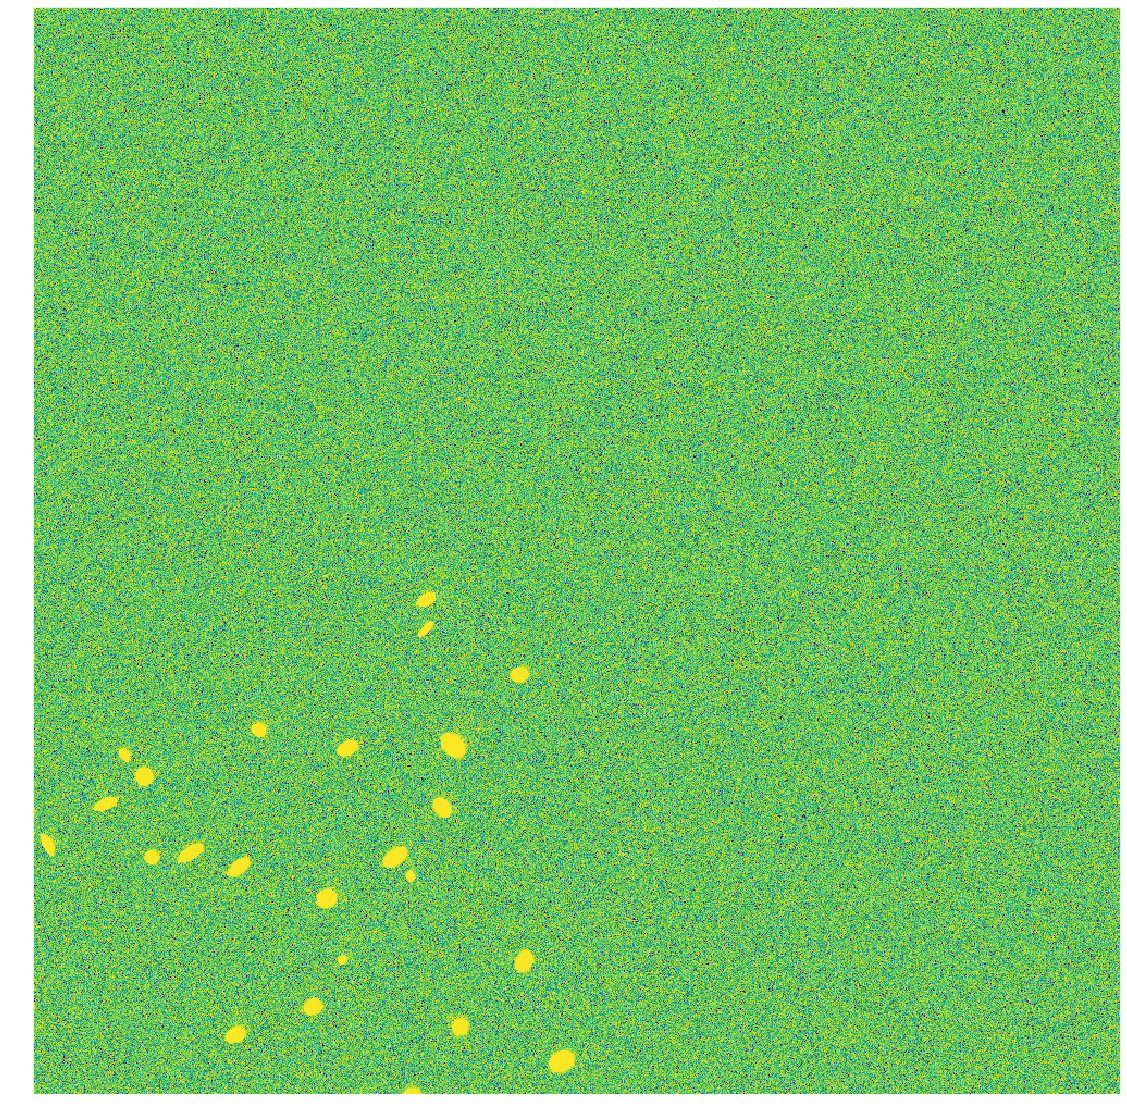

In [5]:
plt.figure(figsize=(20,20))
plt.imshow(stars_background_im,
          norm=visualization.simple_norm(stars_background_im, stretch='asinh',
                                         max_percent=99, min_percent=1))

In [30]:
#MWE
#numbers are random bc i haven't found any that change the outcome
from astropy.convolution import convolve_models, Gaussian2DKernel
from astropy.modeling import models
g1 = models.Gaussian2D(amplitude=2, x_mean=0, y_mean=0, x_stddev=9, y_stddev=10, theta=11)
g2 = models.AiryDisk2D(amplitude=7, x_0=0, y_0=0, radius=1)
g3 = convolve_models(g2, g1)
g3([0],[0])

array([7.])

In [12]:
g1, g2, g3

(<Gaussian2D(amplitude=-1., x_mean=-1., y_mean=-1., x_stddev=2., y_stddev=2., theta=0.)>,
 <Gaussian2D(amplitude=1., x_mean=1., y_mean=1., x_stddev=2., y_stddev=2., theta=2.)>,
 <CompoundModel(amplitude_0=-1., x_mean_0=-1., y_mean_0=-1., x_stddev_0=2., y_stddev_0=2., theta_0=0., amplitude_1=1., x_mean_1=1., y_mean_1=1., x_stddev_1=2., y_stddev_1=2., theta_1=2.)>)